## data will be read from somewhere, right now I am assuming its just in somewhere

In [1]:
import numpy as np
import numpy.random as rando
import math
import pandas as pd
import os
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
np.matrix("1 1 ; 2 1").item(0)

1

In [3]:
def transition (x_hat_plus):
    T=0.01
    tau_rx=0.002
    tau_ry=0.15
    tau_rz=1.0
    x1=x_hat_plus.item(0)
    x2=x_hat_plus.item(1)
    x3=x_hat_plus.item(2)
    x4=x_hat_plus.item(3)
    x5=x_hat_plus.item(4)
    x6=x_hat_plus.item(5)
    x7=x_hat_plus.item(6)
    n2=math.sqrt(x4**2 + x5**2 + x6**2 + x7**2)
    f1=-x1/tau_rx
    f2=-x2/tau_ry
    f3=-x3/tau_rz
    
    f4=0.5*(x3*x5 - x2*x6 + x1*x7)/n2
    f5=0.5*(-x3*x4 + x1*x6 + x2*x7)/n2
    f6=0.5*(x2*x4 - x1*x5 + x3*x7)/n2
    f7=0.5*(-x1*x4 - x2*x5 - x3*x6)/n2
    
    df1_x1=1 - T/tau_rx
    df2_x2=1 - T/tau_ry
    df3_x3=1 - T/tau_rz
    df4_x1=0.5*(x7/n2)
    df4_x2=0.5*(-x6/n2)
    df4_x3=0.5*(x5/n2)
    df4_x4=1 + 0.5*(-f4*x4/(n2**3))
    df4_x5=0.5*(x3/n2 - f4*x5/(n2**3))
    df4_x6=0.5*(-x2/n2 - f4*x6/(n2**3))
    df4_x7=0.5*(x1/n2 - f4*x7/(n2**3))
    df5_x1=0.5*(x6/n2)
    df5_x2=0.5*(x7/n2)
    df5_x3=0.5*(-x4/n2)
    df5_x4=0.5*(-x3/n2 - f5*x4/(n2**3))
    df5_x5=1 + 0.5*(-f5*x5/(n2**3))
    df5_x6=0.5*(x1/n2 - f5*x6/(n2**3))
    df5_x7=0.5*(x2/n2 - f5*x7/(n2**3))
    df6_x1=0.5*(-x5/n2)
    df6_x2=0.5*(x4/n2)
    df6_x3=0.5*(x7/n2)
    df6_x4=0.5*(x2/n2 - f6*x4/(n2**3))
    df6_x5=0.5*(-x1/n2 - f6*x5/(n2**3))
    df6_x6=1+.05*(-f6*x6/n2**3)
    df6_x7=0.5*(x3/n2 - f6*x7/(n2**3))
    
    df7_x1=0.5*(-x4/n2)
    df7_x2=0.5*(-x5/n2)
    df7_x3=0.5*(-x6/n2)
    df7_x4=0.5*(-x1/n2 - f7*x4/(n2**3))
    df7_x5=0.5*(-x2/n2 - f7*x5/(n2**3))
    df7_x6=0.5*(-f7*x7/(n2**3))
    df7_x7=1 + 0.5*(-x2/n2 - f7*x6/(n2**3))
    
    phi=[
        [df1_x1 , 0      , 0      , 0      , 0      ,0,0],
        [0      , df2_x2 , 0      , 0      , 0      ,0,0],
        [0      , 0      , df3_x3 , 0      , 0      ,0,0],
        [df4_x1 , df4_x2 , df4_x3 , df4_x4 , df4_x5 ,df4_x6,df4_x7],
        [df5_x1,df5_x2,df5_x3,df5_x4,df5_x5,df5_x6,df5_x7],
        [df6_x1,df6_x2,df6_x3,df6_x4,df6_x5,df6_x6,df6_x7],
        [df7_x1,df7_x2,df7_x3,df7_x4,df7_x5,df7_x6,df7_x7]
    ]
    return phi


In [4]:
def projection (t,x):
    tau_rx=0.002
    tau_ry=0.15
    tau_rz=1.0
    xprime=[[-x.item(0)/tau_rx],
            [-x.item(1)/tau_ry],
            [-x.item(2)/tau_rz],
            [(x.item(2)*x.item(4)-x.item(1)*x.item(5)+x.item(0)*x.item(6))/(2*math.sqrt(x.item(3)**2+x.item(4)**2+x.item(5)**2+x.item(6)**2))],
            [(-x.item(2)*x.item(3)+x.item(0)*x.item(5)+x.item(1)*x.item(6))/(2*math.sqrt(x.item(3)**2+x.item(4)**2+x.item(5)**2+x.item(6)**2))],
            [(x.item(1)*x.item(3)-x.item(0)*x.item(4)+x.item(2)*x.item(6))/(2*math.sqrt(x.item(3)**2+x.item(4)**2+x.item(5)**2+x.item(6)**2))],
            [(-x.item(0)*x.item(3)-x.item(1)*x.item(4)-x.item(2)*x.item(5))/(2*math.sqrt(x.item(3)**2+x.item(4)**2+x.item(5)**2+x.item(6)**2))]]
    return np.matrix(xprime)

In [5]:
def rungeKutta(tspan, steps, y0):

    [m, n] = np.shape(y0)
    dy = np.zeros((m, (steps + 1)))

    t  = np.zeros((1, (steps + 1)))

    dy[:,[0]] = y  = y0
    t[0]  = ti = tspan[0] 
    h = (tspan[1] - tspan[0]) / float(steps)

    # FIRST ORDER RUNGE-KUTTA
    for i in range(1, steps + 1): # ITERATE 

    # FOURTH ORDER RUNGE-KUTTA
        
        
        k1 = projection(ti, y)
        k1=k1*h
        k2 = projection(ti + h / 2, y + k1 / 2) * h
        k3 = projection(ti + h / 2, y + k2 / 2) * h
        k4 = projection(ti + h, y + k3) * h

        t[0,i]  = ti = tspan[0] + i * h
        dy[:,[i]] = y  = y + (k1 + 2 * (k2 + k3) + k4) / 6

    return(dy, t)

In [6]:
def read_file(file_name):
    file_path = os.path.join(file_name)
    print(file_path)
    print(os.getcwd())
    df = pd.read_csv(file_name,delimiter=",",names=["accX","accY","accZ","gyroX","gyroY","gyroZ","alt","temp"],header=None)
    return df
df = read_file("bigdata")
data = df[["accX","accY","accZ","gyroX","gyroY","gyroZ"]]

bigdata
/home/theurerjohn3


In [7]:
print(data.loc[1]["accX"])


-55


In [8]:
def concat_with_zero(A):
    zero = np.zeros((3,3))
    upper = np.concatenate((A,zero),axis=1)
    lower = np.concatenate((zero,A),axis=1)
    ret= np.concatenate((upper,lower),axis=0)
    return ret

In [9]:
def converge(ye,yb,guess,k):
    n_hat = guess
    
    n_hat = n_hat/math.sqrt( n_hat.transpose() * n_hat )


    a = n_hat.item(0)
    b = n_hat.item(1)
    c = n_hat.item(2)
    d = n_hat.item(3)
    R_a = np.matrix([[a,b,c],[b,-a,-d],[c,d,-a]])
    d_R_a = 2*concat_with_zero(R_a)

    R_b = np.matrix([[-b,a,d],[a,b,c],[-d,c,-b]])
    d_R_b = 2*concat_with_zero(R_b)

    R_c = np.matrix([[-c,-d,a],[d,-c,b],[a,b,c]])
    d_R_c = 2*concat_with_zero(R_c)
    
    R_d = np.matrix([[d,-c,b],[c,d,-a],[-b,a,d]])
    d_R_d = 2*concat_with_zero(R_d)
    
    yb_trans=yb.T
    jacobian = np.concatenate(((d_R_a*yb_trans).T,(d_R_b*yb_trans).T,(d_R_c*yb_trans).T,(d_R_d*yb_trans).T),axis=0).T
    
    
    
    
    
    

    M_hat = [
    [ d*d+a*a-b*b-c*c , 2*(a*b-c*d) , 2*(a*c+b*d) ],
    [ 2*(a*b+c*d) , d*d+b*b-a*a-c*c , 2*(c*b-a*d) ],
    [ 2*(a*c-b*d) , 2*(b*c+a*d) , d*d+c*c-a*a-b*b ]
    ]

    R_hat = concat_with_zero(M_hat)
    
    err = ye - R_hat*(yb.transpose()) # 6x1
    #print(n_hat)
#     n_hat = 4x1
# jacobian = 4x6

# 6x4 * 4x6)
    n_hat = n_hat - (jacobian.transpose()*jacobian).I*jacobian.transpose()*err

    n_hat = n_hat/math.sqrt(n_hat.transpose()*n_hat)

    A = (jacobian.transpose()*jacobian).I*jacobian.transpose()*R_hat

    cat = n_hat-guess
    ssum = 0
    for el in cat:
        ssum+=el*el
    distance = ssum

    n = n_hat

    if k == 1:
        flag = 1
    else:
        if distance <= .05:
            flag = 1
        else:
            flag = 0
    return [n,flag,A]

In [10]:
x = np.matrix([1,2])
y = np.matrix([2,3])
cat = np.concatenate((x,y),axis=0)
print(cat)

[[1 2]
 [2 3]]


In [11]:
sim_data = []


In [12]:
#definitions
run_time = 4.50 #simulation time in minutes
T = 0.125 #resolution time in seconds
samp = 39619 #run_time * 60.0/T # number of samples

In [13]:
#time constants
tau_rx = 0.002
tau_ry = 0.15
tau_rz = 1.0

In [14]:
# Values of standared devation used in the Q matrix - E[w'*w]

stdA =0.00000001
stdB = 0.01
stdC = 0.30

In [15]:
# process model - noise vector for angular rates
# randn('state',sum(100*clock))
wrx = np.matrix(rando.normal(0,stdA,math.floor(samp)))
wry = np.matrix(rando.normal(0,stdB,math.floor(samp)))
wrz = np.matrix(rando.normal(0,stdC,math.floor(samp)))


In [16]:
# process model - noise vector for quaterions - no noise
wna = np.matrix([0] * math.floor(samp))
wnb = np.matrix([0] * math.floor(samp))
wnc = np.matrix([0] * math.floor(samp))
wnd = np.matrix([0] * math.floor(samp))
print(wnc)

[[0 0 0 ..., 0 0 0]]


In [17]:
cat = np.matrix([[1,1,1]])
print(cat.item(0,1))

1


In [18]:
# system noise vector
satan = []
satan.append([])
satan.append([])
satan.append([])
satan.append([])
satan.append([])
satan.append([])
satan.append([])

for i in range(0,math.floor(samp)):
    satan[0].append(wrx.item(0,i))
    satan[1].append(wry.item(0,i))
    satan[2].append(wrz.item(0,i))
    satan[3].append(wna.item(0,i))
    satan[4].append(wnb.item(0,i))
    satan[5].append(wnc.item(0,i))
    satan[6].append(wnd.item(0,i))

w = np.matrix(satan)


In [19]:
# measurements - noise vector for angular rates

vrx = np.matrix(rando.normal(0,1,math.floor(samp)))
vry = np.matrix(rando.normal(0,1,math.floor(samp)))
vrz = np.matrix(rando.normal(0,1,math.floor(samp)))


In [20]:
# measurements noise vector for angular rates
vna = np.matrix(rando.normal(0,1,math.floor(samp)))
vnb = np.matrix(rando.normal(0,1,math.floor(samp)))
vnc = np.matrix(rando.normal(0,1,math.floor(samp)))
vnd = np.matrix(rando.normal(0,1,math.floor(samp)))

# measurement noise vector
print(vna)

[[-0.38458244 -1.72655046 -0.93928034 ..., -0.33749079  1.79573195
  -0.30310483]]


In [21]:
# v = [vrx,vry,vrz,vna,vnb,vnc,vnd]
# system noise vector
satan = []
satan.append([])
satan.append([])
satan.append([])
satan.append([])
satan.append([])
satan.append([])
satan.append([])

for i in range(0,math.floor(samp)):
    satan[0].append(vrx.item(0,i))
    satan[1].append(vry.item(0,i))
    satan[2].append(vrz.item(0,i))
    satan[3].append(vna.item(0,i))
    satan[4].append(vnb.item(0,i))
    satan[5].append(vnc.item(0,i))
    satan[6].append(vnd.item(0,i))

v = np.matrix(satan)


In [22]:
#inital conditions
x_hat_minus = np.matrix('.01;.01;.01;0.5;0.5;0.5;0.5')
print (x_hat_minus)

[[ 0.01]
 [ 0.01]
 [ 0.01]
 [ 0.5 ]
 [ 0.5 ]
 [ 0.5 ]
 [ 0.5 ]]


In [23]:
# inital covariance matrix
p_minus = np.diag([0.5,0.5,0.5,0.5,0.5,0.5,0.5])


In [24]:
# Flag = 0 quaternions do not converge

R_0 = np.matrix([
    [ (0.0000736)*(0.0000736) , 0 , 0 ],
    [ 0 , (0.015)*(0.015) , 0 ],
    [ 0 , 0 , (0.029)*(0.029) ]
])
H_1 = np.matrix([[[ 1 , 0 , 0 ] , [ 0 , 1 , 0 ], [ 0 , 0 , 1 ]], [[0,0,0,0],[0,0,0,0],[0,0,0,0]]])
H_0 = np.matrix(np.concatenate((np.eye(3), np.zeros((3,4))), axis=1))
print(H_0)


[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]]


In [25]:
# Flag = 1 quaternions converge
R_aux  = np.matrix([
    [ (0.110)*(0.110) , 0 , 0 , 0 , 0 , 0 ],
    [ 0 , (0.167)*(0.167) , 0 , 0 , 0 , 0 ],
    [ 0 , 0 , (0.045)*(0.045) , 0 , 0 , 0 ],
    [ 0 , 0 , 0 , (0.030)*(0.030) , 0 , 0 ],
    [ 0 , 0 , 0 , 0 , (0.030)*(0.030) , 0 ],
    [ 0 , 0 , 0 , 0 , 0 , (0.030)*(0.030) ]
])
H_1 = np.matrix([
            [1,0,0,0,0,0,0],
            [0,1,0,0,0,0,0],
            [0,0,1,0,0,0,0],
            [0,0,0,1,0,0,0],
            [0,0,0,0,1,0,0],
            [0,0,0,0,0,1,0],
            [0,0,0,0,0,0,1]
          ])


In [26]:
# process noise covariance matrix
Q = np.diag([ stdA*stdA , stdB*stdB , stdC*stdC , 0 , 0 , 0 , 0 ])


In [27]:
x_hat_plus_cum = x_hat_minus
print(x_hat_plus_cum)

[[ 0.01]
 [ 0.01]
 [ 0.01]
 [ 0.5 ]
 [ 0.5 ]
 [ 0.5 ]
 [ 0.5 ]]


In [28]:
# Accumulate all the estimates
n_acum = []

In [29]:
sim_data = np.matrix([np.random.rand() for _ in range(9)]).T
print(sim_data)

[[ 0.51550248]
 [ 0.69603082]
 [ 0.51538278]
 [ 0.52640111]
 [ 0.67067325]
 [ 0.12696282]
 [ 0.6640222 ]
 [ 0.08631035]
 [ 0.87974726]]


In [30]:
# variable list and size
# 





# Registry number of times the convergence algorithm diverges
flag_cum = []
count =0
# for k in range(2,math.floor(samp)):
for k in range(2,math.floor(samp)):
    ye = np.matrix([
        [0],
        [0],
        [-1],
        [-0.5],
        [0],
        [math.sqrt(3)/2]
        
    ])
    
    sim_data = np.matrix([np.random.rand() for _ in range(9)]).T

    
    # step one is read data
    g_norm = np.matrix([[data.loc[k]["accX"]],[data.loc[k]["accY"]],[data.loc[k]["accZ"]]])
    #print("g_norm:")
    #print(g_norm)
    h_norm = sim_data[3:6]
    #print("h_norm:")
    #print(h_norm)
    for i in range(0,3):
        g_norm[i]= (g_norm[i][0] / 256.0) * 9.8
    # take data into g_norm and h_norm
    yb = np.concatenate((g_norm, h_norm),axis=0).T
    # first guess is the current quaternion
    guess = np.matrix(x_hat_minus[3:7])
    #n,flag,A = something 
    # step two converge the quaternions using x_hat(k|k-1)
    n,flag,A = converge(ye,yb,guess,k)
    flag_cum = [flag_cum, flag]
    P_minus = np.diag([ .05 , .05 , .05 , .05 , .05 , .05 , .05 ])
    
    n_acum = [n_acum , n]
    if flag == 1 : # if the quaterinons converge
        #get data into z
        #print("n")
        #print(n)
        holder = np.matrix([[data.loc[k]["gyroX"]],[data.loc[k]["gyroY"]],[data.loc[k]["gyroZ"]]])
        for i in range(0,3):
            holder[i]= (holder[i][0] / 1000.0)
        #print("holder")
        #print(holder)
        z = np.concatenate((holder,n),axis=0)
        
        top_half = np.concatenate((R_0,np.zeros((3,4))),axis=1)
        bottom_half = np.concatenate((np.zeros((4,3)),A*R_aux*A.transpose()),axis=1)
        R_1 = np.concatenate((top_half,bottom_half), axis=0)
        
        K = P_minus * H_1.transpose() * ( H_1*P_minus*H_1.transpose() + R_1).I
        x_hat_plus = x_hat_minus + K*(z-H_1*x_hat_minus)
        
        P_plus = (np.identity(7) - K*H_1)*P_minus
    else:
        #get data into z
        z = np.matrix([[data.loc[k]["gyroX"]],[data.loc[k]["gyroY"]],[data.loc[k]["gyroZ"]]])
        for i in range(0,3):
            z[i]= (z[i][0] / 1000.0)
        K = P_minus * H_0.transpose() * ( H_0*P_minus*H_0.transpose() + R_0).I
        x_hat_plus = x_hat_minus + K*(z-H_0*x_hat_minus)
        
        P_plus = (np.identity(7) - K*H_0)*P_minus
        
        count+1
    #print(k)
    #print(x_hat_plus[3:])
    
    x_hat_plus_cum = np.concatenate((x_hat_plus_cum,x_hat_plus),axis=1)
    phi = np.matrix(transition(x_hat_plus))
    P_minus = phi*P_plus*phi.transpose()+Q
    
    x_aux,ti = rungeKutta([0,T],1,x_hat_plus)
    #ti,x_aux = ode45('projection',[0,T],x_hat_plus)
    
    #print(x_hat_minus)
    carryover = []
    for i in range(0,7):
        carryover.append([])
        carryover[i].append(x_aux.item(i,1))
    x_hat_minus = np.matrix(carryover)
    #x_hat_minus = x_aux[1]
    


    
        

In [31]:
H_0*P_minus

matrix([[  8.66713507e-08,   0.00000000e+00,   0.00000000e+00,
          -8.62984796e-09,  -5.81905008e-09,  -2.83933006e-10,
          -2.99291824e-09],
        [  0.00000000e+00,   2.95121951e-04,   0.00000000e+00,
          -5.61443264e-05,   8.32639337e-05,  -2.88767713e-05,
           2.73948964e-06],
        [  0.00000000e+00,   0.00000000e+00,   9.08106293e-02,
          -1.07296960e-05,   1.13100986e-04,   3.26117934e-04,
          -2.19899191e-04]])

In [32]:
type(P_minus)

numpy.matrixlib.defmatrix.matrix

In [33]:
print(x_hat_plus_cum)

[[  1.00000000e-02   1.08339188e-09   7.00703257e-11 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e-02   4.47984072e-05   8.78082084e-08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e-02   1.65417675e-04   2.41477758e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  5.00000000e-01   4.13300627e-01   3.26902239e-01 ...,  -1.70801632e+03
   -1.70801632e+03  -1.70801632e+03]
 [  5.00000000e-01   3.78633716e-01   2.61982191e-01 ...,   3.50048507e+04
    3.50048507e+04   3.50048507e+04]
 [  5.00000000e-01   5.54095562e-01   5.87170534e-01 ...,   5.19133767e+04
    5.19133767e+04   5.19133767e+04]]


39618
39618


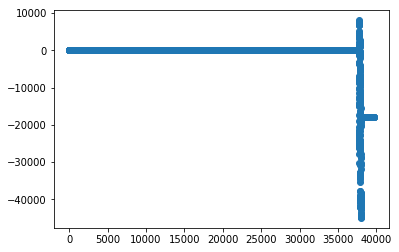

In [34]:
plottyA = []
plottyB = []
plottyC = []
plottyD = []

y,cruel =x_hat_plus_cum.shape
for i in range(0,cruel):
    plottyA.append(x_hat_plus_cum.item(3,i))
    plottyB.append(x_hat_plus_cum.item(4,i))
    plottyC.append(x_hat_plus_cum.item(5,i))
    plottyD.append(x_hat_plus_cum.item(6,i))
    
print(len(plottyA))
danger = range(0,cruel)
print(len(danger))

plt.scatter(danger,plottyA)
plt.show()

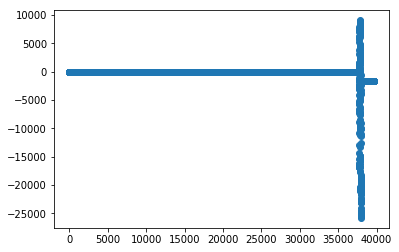

In [35]:
plt.scatter(danger,plottyB)
plt.show()

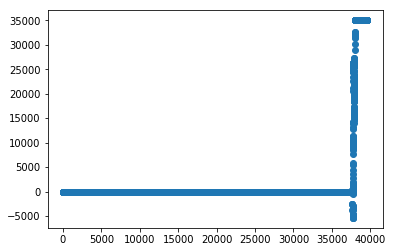

In [36]:
plt.scatter(danger,plottyC)
plt.show()

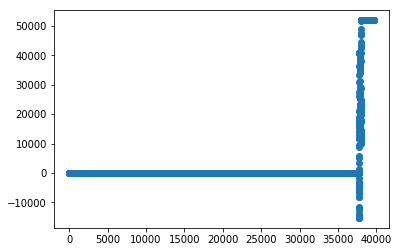

In [37]:
plt.scatter(danger,plottyD)
plt.show()

In [ ]:
x = 5
int x = 5;
x = "thingy"
String x = "thingy";
Cstrings 